# BIOS 512 Final Project 
***

##### Coding Section 

In [1]:
#Load Data 
library('tidyverse')
villagers <- readr::read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv')
items <- readr::read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/items.csv')


Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  row_n = col_double(),
  id = col_character(),
  name = col_character(),
  gender = col_character(),
  species = col_character(),
  birthday = col_character(),
  personality = col_character(),
  song = col_character(),
  phrase = col_character(),
  full_id = c

In [2]:
#for some reason, the p + p2 option kept getting an error and so googled for this multiplot function? 

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


In [3]:
###All the code for data visualization 
#Gender Distribution 
p = ggplot(villagers, aes(y = personality %>% fct_infreq() %>% fct_rev(), fill = gender))

p = p + geom_bar()

p = p + labs(x = "Number of Villagers", y = "Personality Type", fill = "Gender")

p = p + labs(title = "B. Villager Personality Type")

p = p + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

p2 = ggplot(villagers, aes(x = gender, fill = gender))
p2 = p2 + geom_bar()
p2 = p2 + labs(x = "Villager Gender", y = "Number of Villager", title = "A. Villager Gender", fill = "Gender")
p2 = p2 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

p3 = ggplot(villagers, aes(y = species %>% fct_infreq() %>% fct_rev(), fill = gender))
p3 = p3 + geom_bar()

p3 = p3 + labs(x = "Number of Villager", y = "Species", title = "C. Villager Species Distribution", fill = "Gender")
p3 = p3 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

#Species Distribution 
male_types = villagers %>%
    filter(gender == 'male') %>%
    group_by(species) %>%
    count() %>%
    ungroup() %>%
    mutate(Mspecies_sorted = species %>% fct_reorder(n, max))

female_types = villagers %>%
    filter(gender == 'female') %>%
    group_by(species) %>%
    count() %>%
    ungroup() %>%
    mutate(Fspecies_sorted = species %>% fct_reorder(n, max))
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)

p4 = ggplot(villagers %>% filter(gender == "male"), aes(y = species %>% fct_infreq() %>% fct_rev(), fill = personality))
p4 = p4 + geom_bar()
p4 = p4 + labs(x = "Number of Villagers", y = "Species", fill = "Personality", title = "A. Male Villager Species")
p4 = p4 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

p5 = ggplot(villagers %>% filter(gender == "female"), aes(y = species %>% fct_infreq() %>% fct_rev(), fill = personality))
p5 = p5 + geom_bar()
p5 = p5 + labs(x = "Number of Villagers", y = "Species", fill = "Personality", title = "B. Female Villager Species")
p5 = p5 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

#Profitable Methods
sourcescount = items %>%
    group_by(sources) %>%
    summarize(maxsell = max(sell_value)) %>%
    arrange(maxsell)

p6 = ggplot(sourcescount %>% top_n(7), aes(y = reorder(sources, -maxsell) , x = maxsell))
p6 = p6 + geom_col() 
p6 = p6 + labs(x = "Maximum Sell Value (Bells)", y = "Item Source", title = "A. Most Profitable Method")
p6 = p6 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

p7 = ggplot(sourcescount %>% top_n(-7), aes(y = reorder(sources, -maxsell) , x = maxsell))
p7 = p7 + geom_col() 
p7 = p7 + labs(x = "Maximum Sell Value (Bells)", y = "Item Source", title = "B. Least Profitable Method")
p7 = p7 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

MostProfit = items %>%
    filter(sources == "DIY") %>%
    arrange(sell_value)

#Mean Cost to sell vs buy 
meancosttosell = items %>%
    group_by(category) %>%
    filter(sell_value != "NA") %>%
    summarize(meansell = mean(sell_value)) %>%
    arrange(-meansell)

meancosttobuy = items %>%
    group_by(category) %>%
    filter(buy_value != "NA") %>%
    summarize(meanbuy = mean(buy_value)) %>%
    arrange(-meanbuy)
belltotal <- inner_join(meancosttobuy, meancosttosell, by="category")
belltotalcombined <- tidyr::pivot_longer(belltotal, cols=c('meanbuy', 'meansell'), names_to='variable', 
values_to="value")
p8 = ggplot(belltotalcombined, aes(x=category, y=value, fill=variable)) 
p8 = p8 + geom_bar(stat='identity', position='dodge')
p8 = p8 + guides(x = guide_axis(angle = 90))
p8 = p8 + labs(x = "Item Category", y = "Bells", fill = "Type", 
             title = "A. Mean Buy and Sell Value for Each Item Category")
p8 = p8 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
)

#Sell Value Distribution by Categories 
clothes_sorted = items %>%
    filter(sell_value != "NA") %>%
    filter(category %in% c("Accessories", "Bottoms", "Dresses", "Hats", "Shoes", "Socks", "Tops")) %>% 
    group_by(category) 
p9 = ggplot(clothes_sorted, aes(x = category, y = sell_value)) 
p9 = p9 + geom_boxplot()
p9 = p9 + geom_point(position = position_jitter(h = 0, w = 0.20), size = 1, alpha=.3, colour = "purple")
ylim1 = boxplot.stats(clothes_sorted$sell_value)$stats[c(1, 5)]
p9 = p9 + coord_cartesian(ylim = ylim1*1.05)
p9 = p9 + labs(x = "Clothing Category", y = "Sell Value (Bells)", title = "B. Sell Value Distribution among Clothes")
p9 = p9 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

nonclothes_sorted = items %>%
    filter(sell_value != "NA") %>%
    filter(sell_value < 100000) %>%
    filter(category %in% c("Furniture", "Wallpaper", "Flooring", "Tools", "Music", "Usables", "Umbrellas")) %>% 
    group_by(category) 
p10 = ggplot(nonclothes_sorted, aes(x = category, y = sell_value)) 
p10 = p10 + geom_boxplot()
p10 = p10 + geom_point(position = position_jitter(h = 0, w = 0.20), size = 1, alpha=.3, colour = "blue")
ylim1 = boxplot.stats(nonclothes_sorted$sell_value)$stats[c(1, 5)]
p10 = p10 + coord_cartesian(ylim = ylim1*1.05)
p10 = p10 + labs(x = "Item Category", y = "Sell Value (Bells)", title = "C. Sell Value Distribution among Items")
p10 = p10 + theme(
    axis.title.x = element_text(margin = margin(t = 12)),
    axis.title.y = element_text(margin = margin(r = 12))
) 

`summarise()` ungrouping output (override with `.groups` argument)

Selecting by maxsell

Selecting by maxsell

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



***

![Alternative text describing the image](https://i.ytimg.com/vi/ymYC2TItmt4/maxresdefault.jpg)

Per [Wikipedia:](https://en.wikipedia.org/wiki/Animal_Crossing:_New_Horizons)

> Animal Crossing: New Horizons is a 2020 life simulation video game developed and published by Nintendo for the Nintendo Switch. It is the fifth main series title in the Animal Crossing series. New Horizons was released in all regions on March 20, 2020.

> New Horizons sees the player assuming the role of a customizable character who moves to a deserted island after purchasing a package from Tom Nook, a tanuki character who has appeared in every entry in the Animal Crossing series. Taking place in real-time, the player can explore the island in a nonlinear fashion, gathering and crafting items, catching insects and fish, and developing the island into a community of anthropomorphic animals.

![Alternative text describing the image](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2020/03/animal-crossing-villagers.jpg)

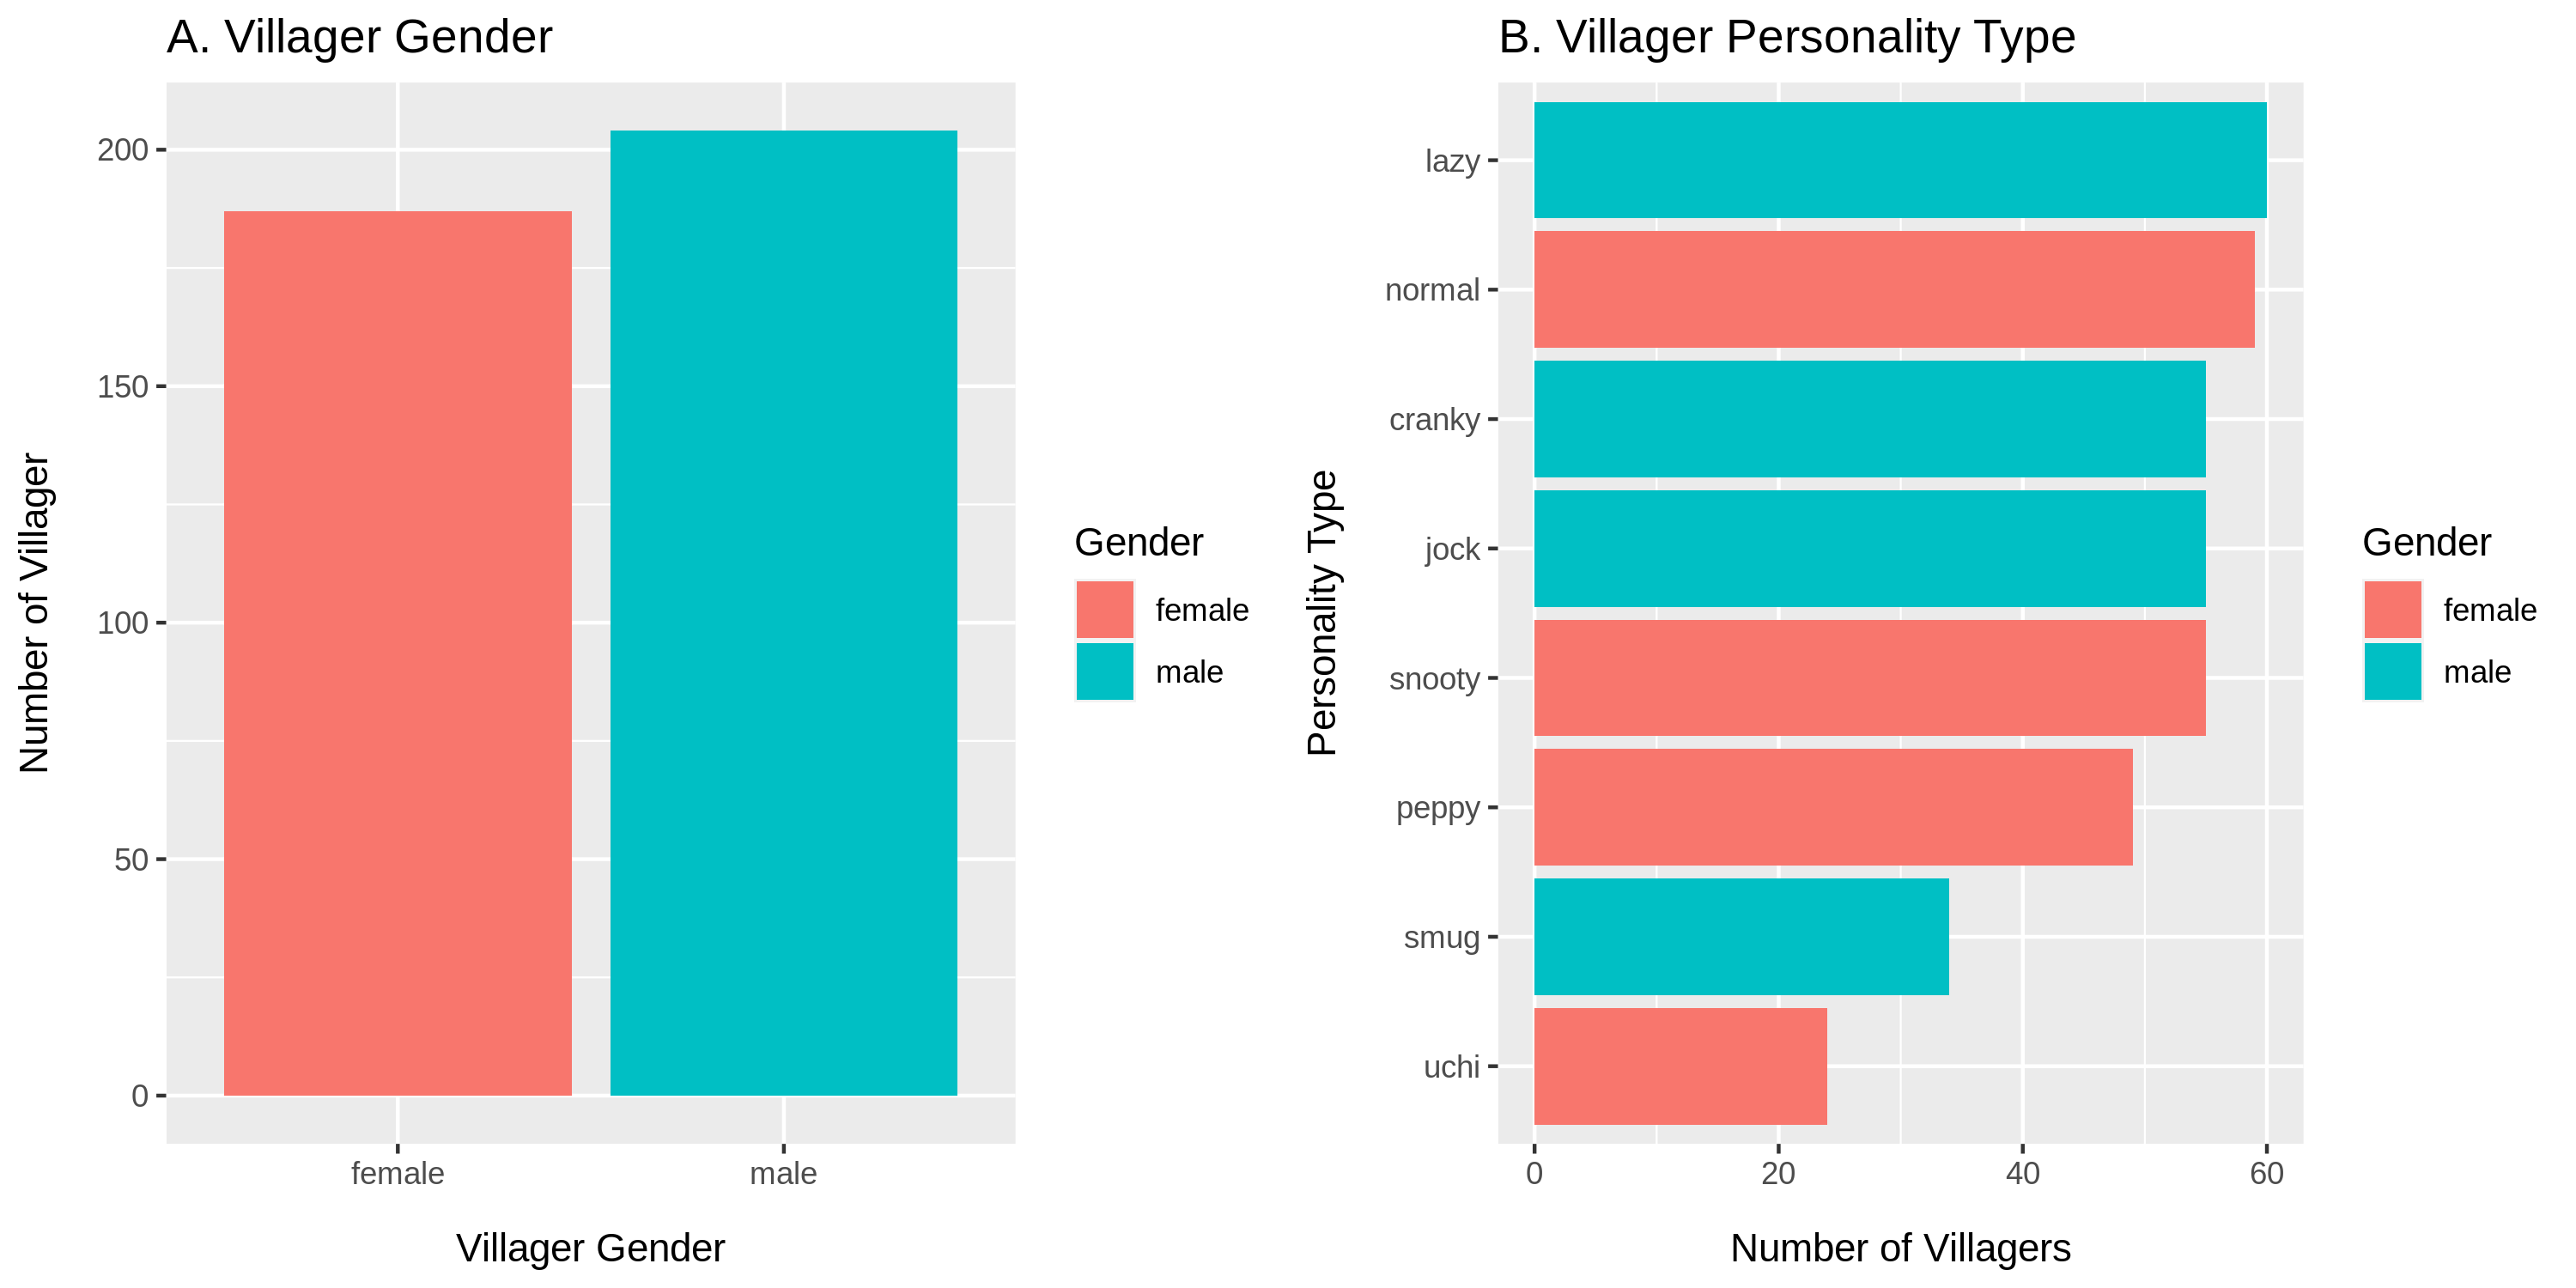

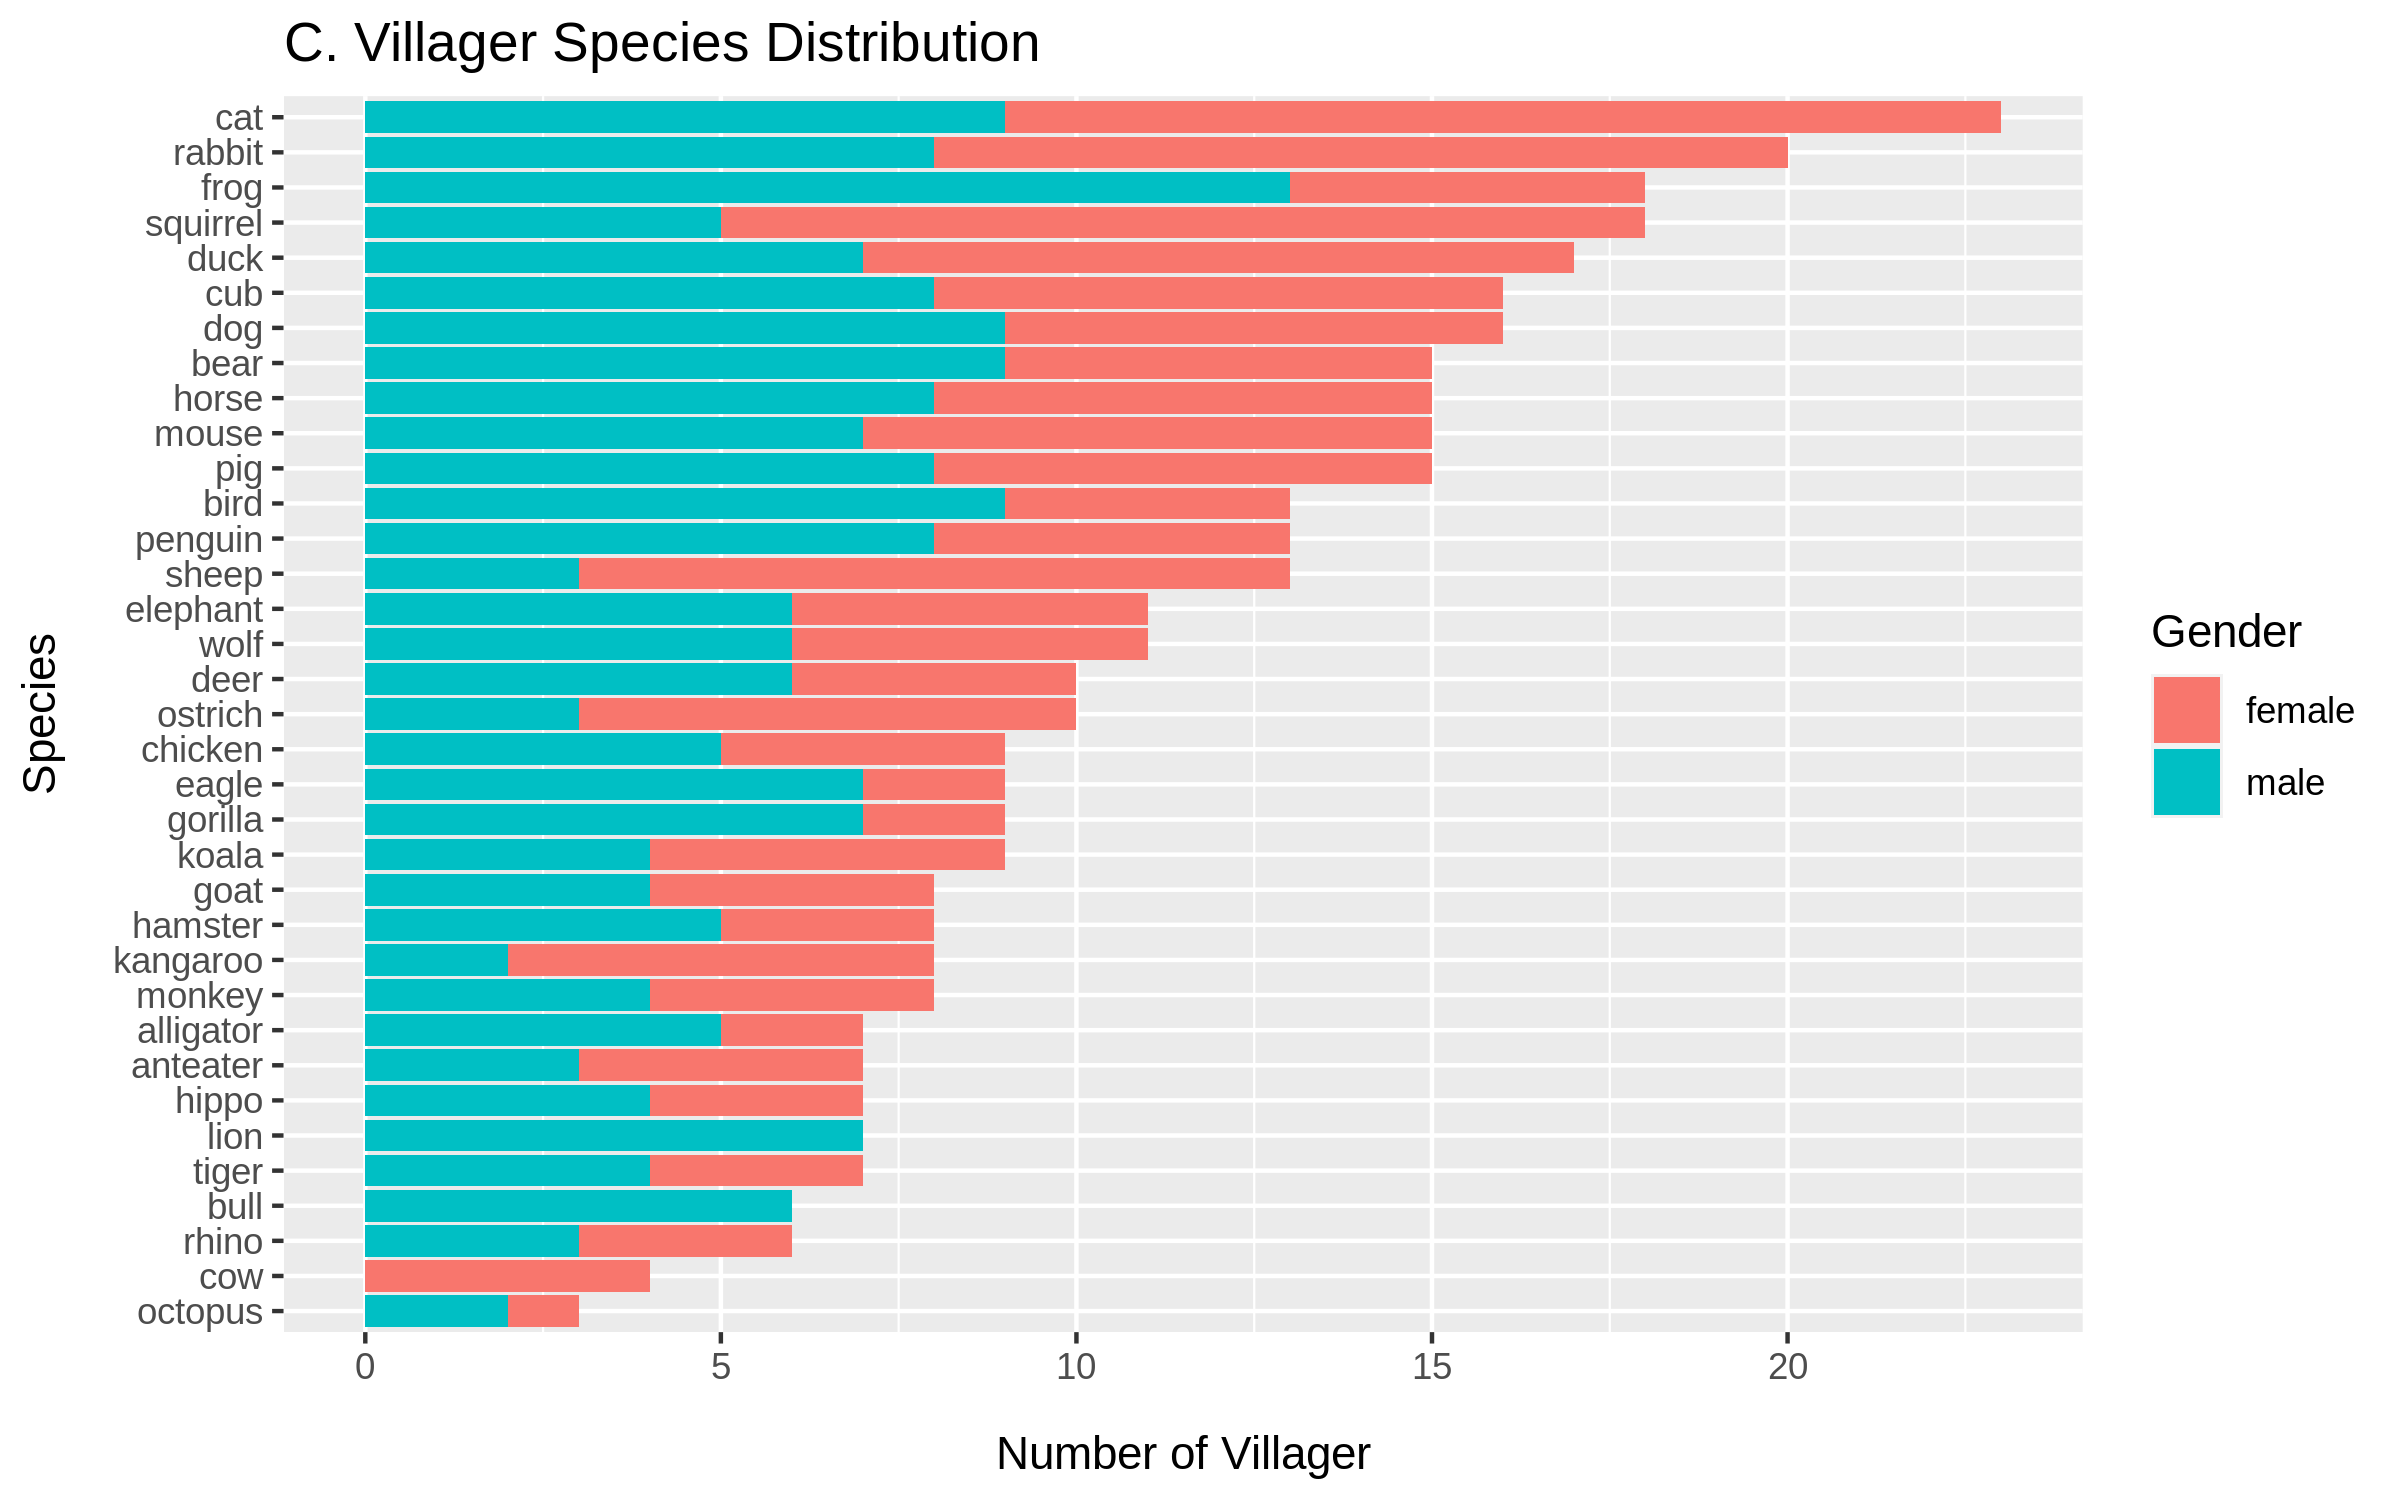

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
multiplot(p2, p, cols=2)
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)
p3

In the game, there are 391 villagers available for players to invite to live in their island. Villagers can be variety of animals from cats to penguins to octopi. And each may have one of the 8 main personalities types: lazy, cranky, jock and smug for male villagers; normal, snooty, peppy and uchi (sisterly) for female villagers. Of the villagers available, there are more males than females (Figure A), so it is slightly more likely that the player will see a male villager while island hopping to invite villagers. For male villagers, lazy personalities are the most predominant, while there are less smug personalities (Figure B). For female, normal personalities are the most common, while uchi (sisterly) personalities are the least common (Figure B). As for species, cats are most common while octopi are least common (Figure C). It's also notable that there are only female cow villagers and only male lion and bull villagers. Females tend to dominant sheep species as well as kangaroos, while males tend to dominant eagle, gorilla and frog species (Figure C). 

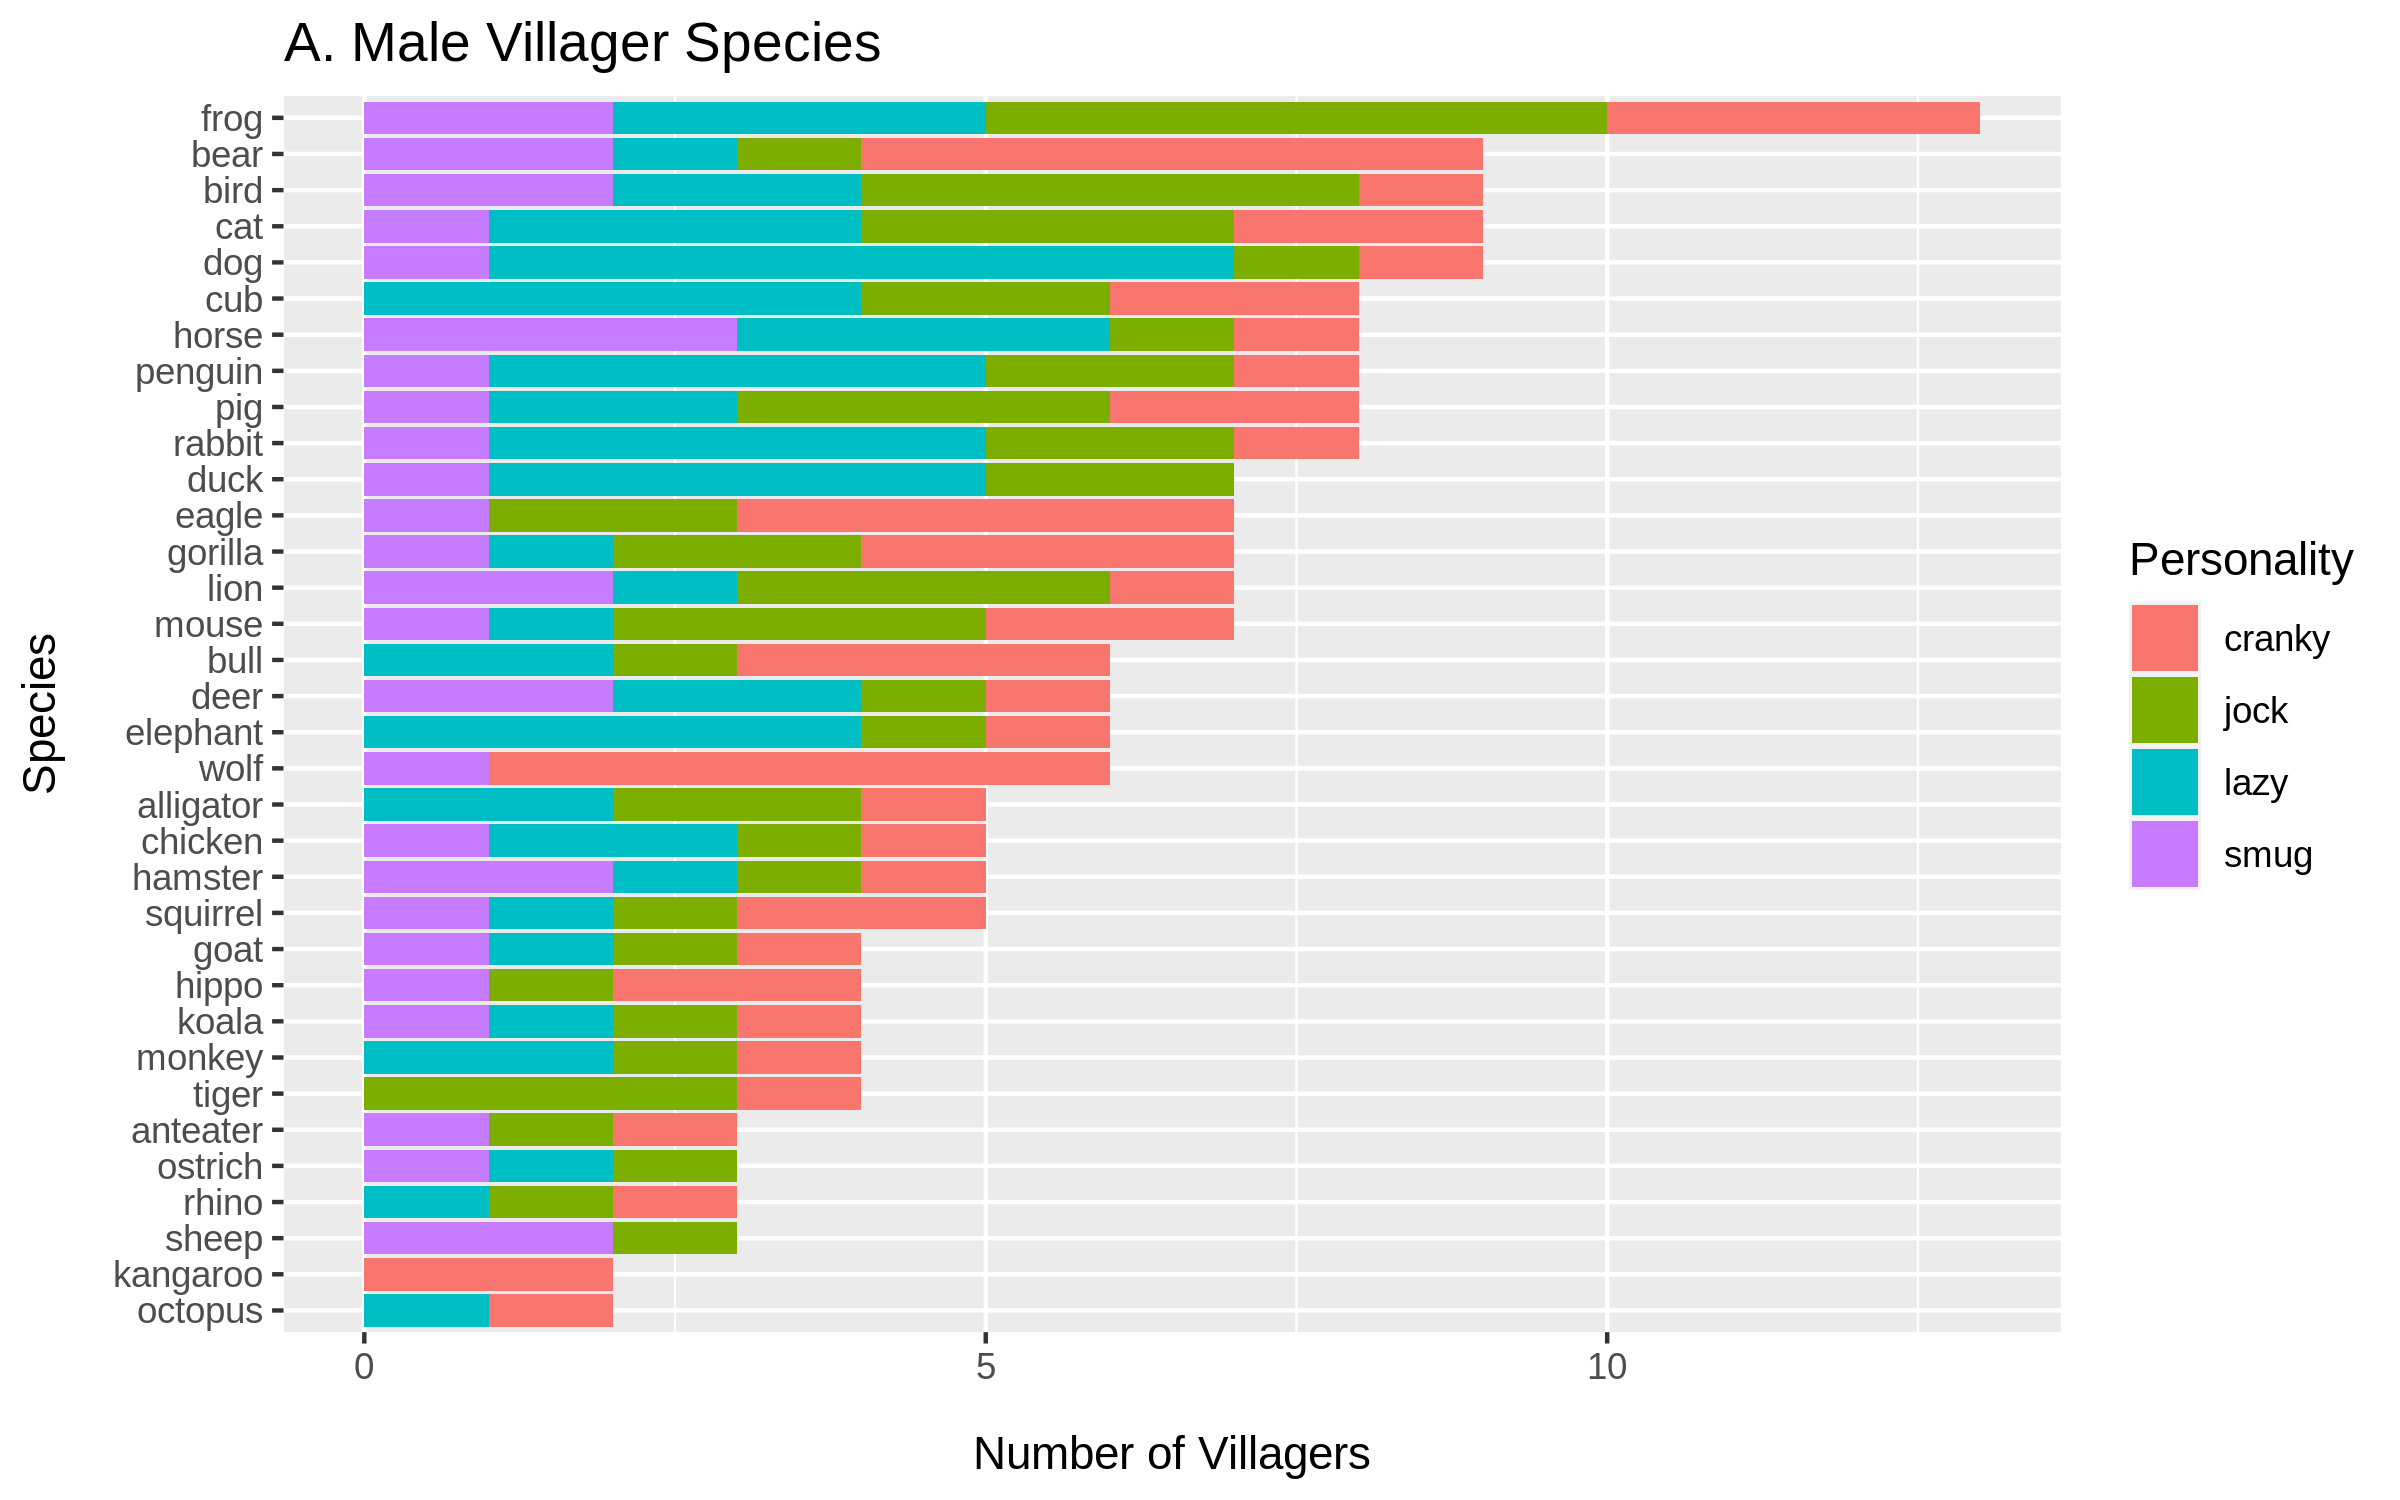

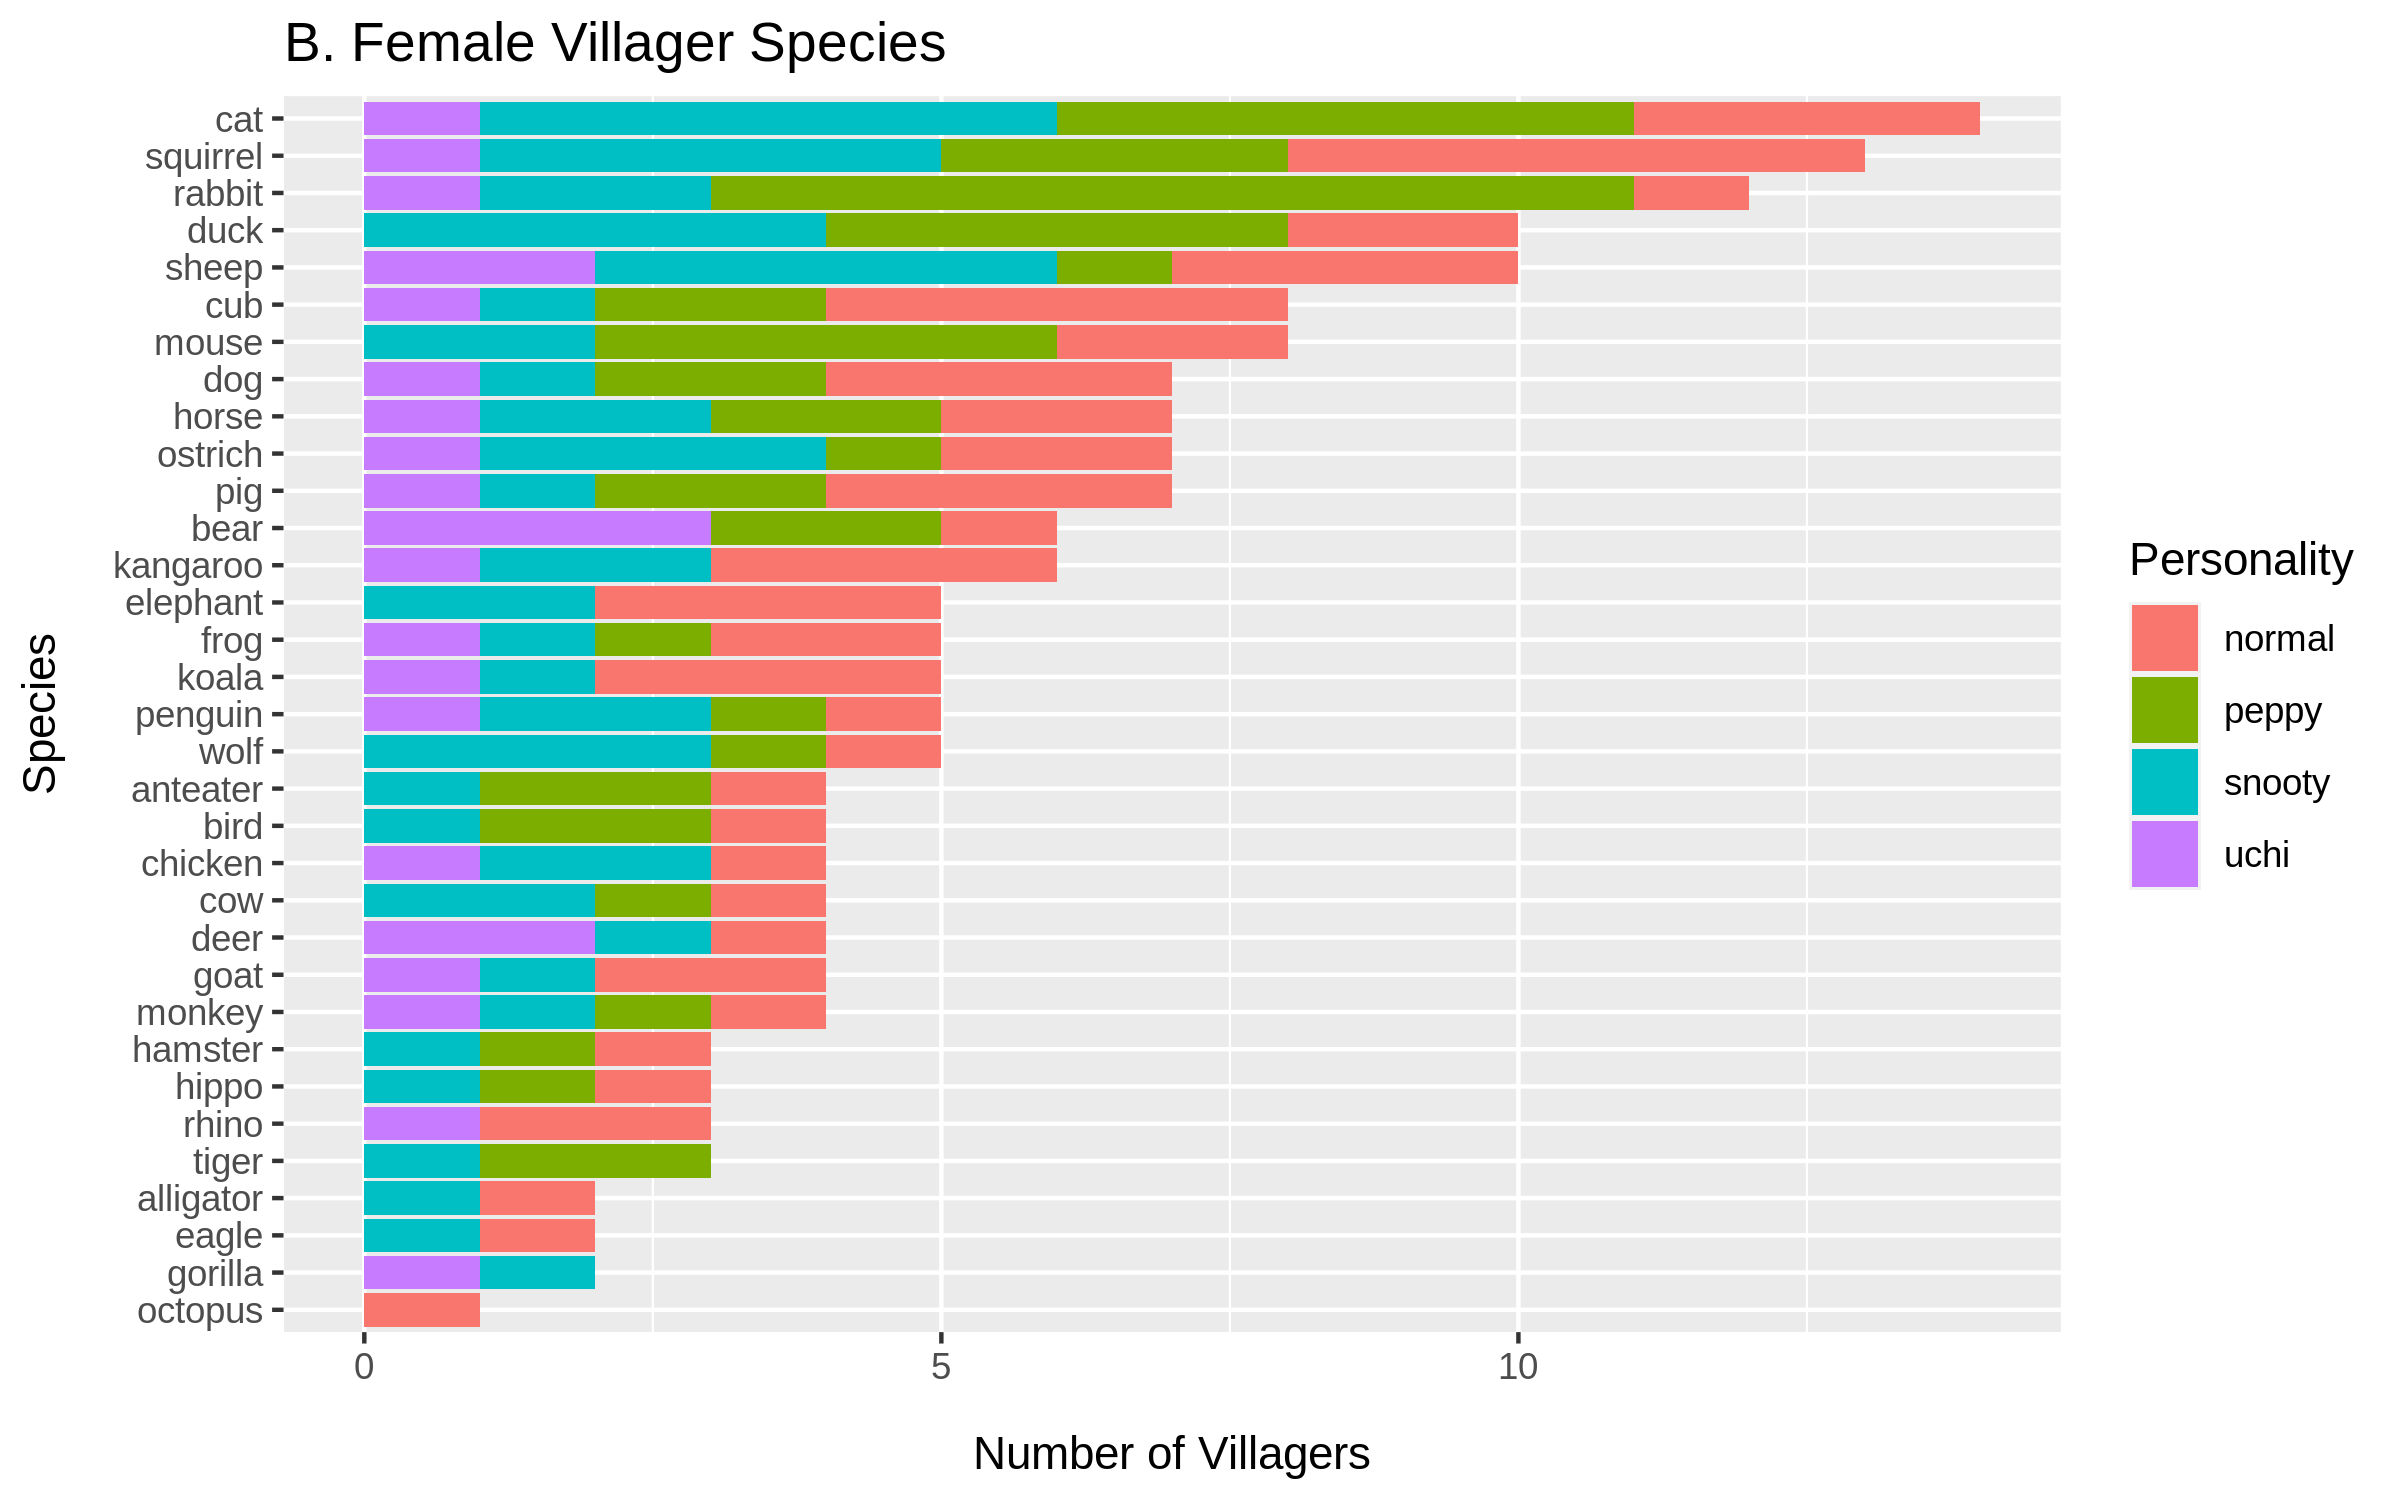

In [5]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)
p4
p5

The above two graphs breaks down species further between personalities and gender. Frog are the most common species for male, while cats are the most common species for female. For both gender, octupi are the least common, although kangeroos tie with octupi numbers for males. Certain personalities seems to dominant particular species. For example, male wolves and kangeroos are predominantly cranky personalities. Male tigers tend to be jocks, male sheeps tend to be smug, while male elephants, dogs and ducks tend to be lazy. Female villagers appear to have a more rounded distribution, but there are few species with dominant personalities, such as female rabbits tend to be peppy in personality. 

***

![Alternative text describing the image](https://i.ytimg.com/vi/rN0EEglpaP0/maxresdefault.jpg)

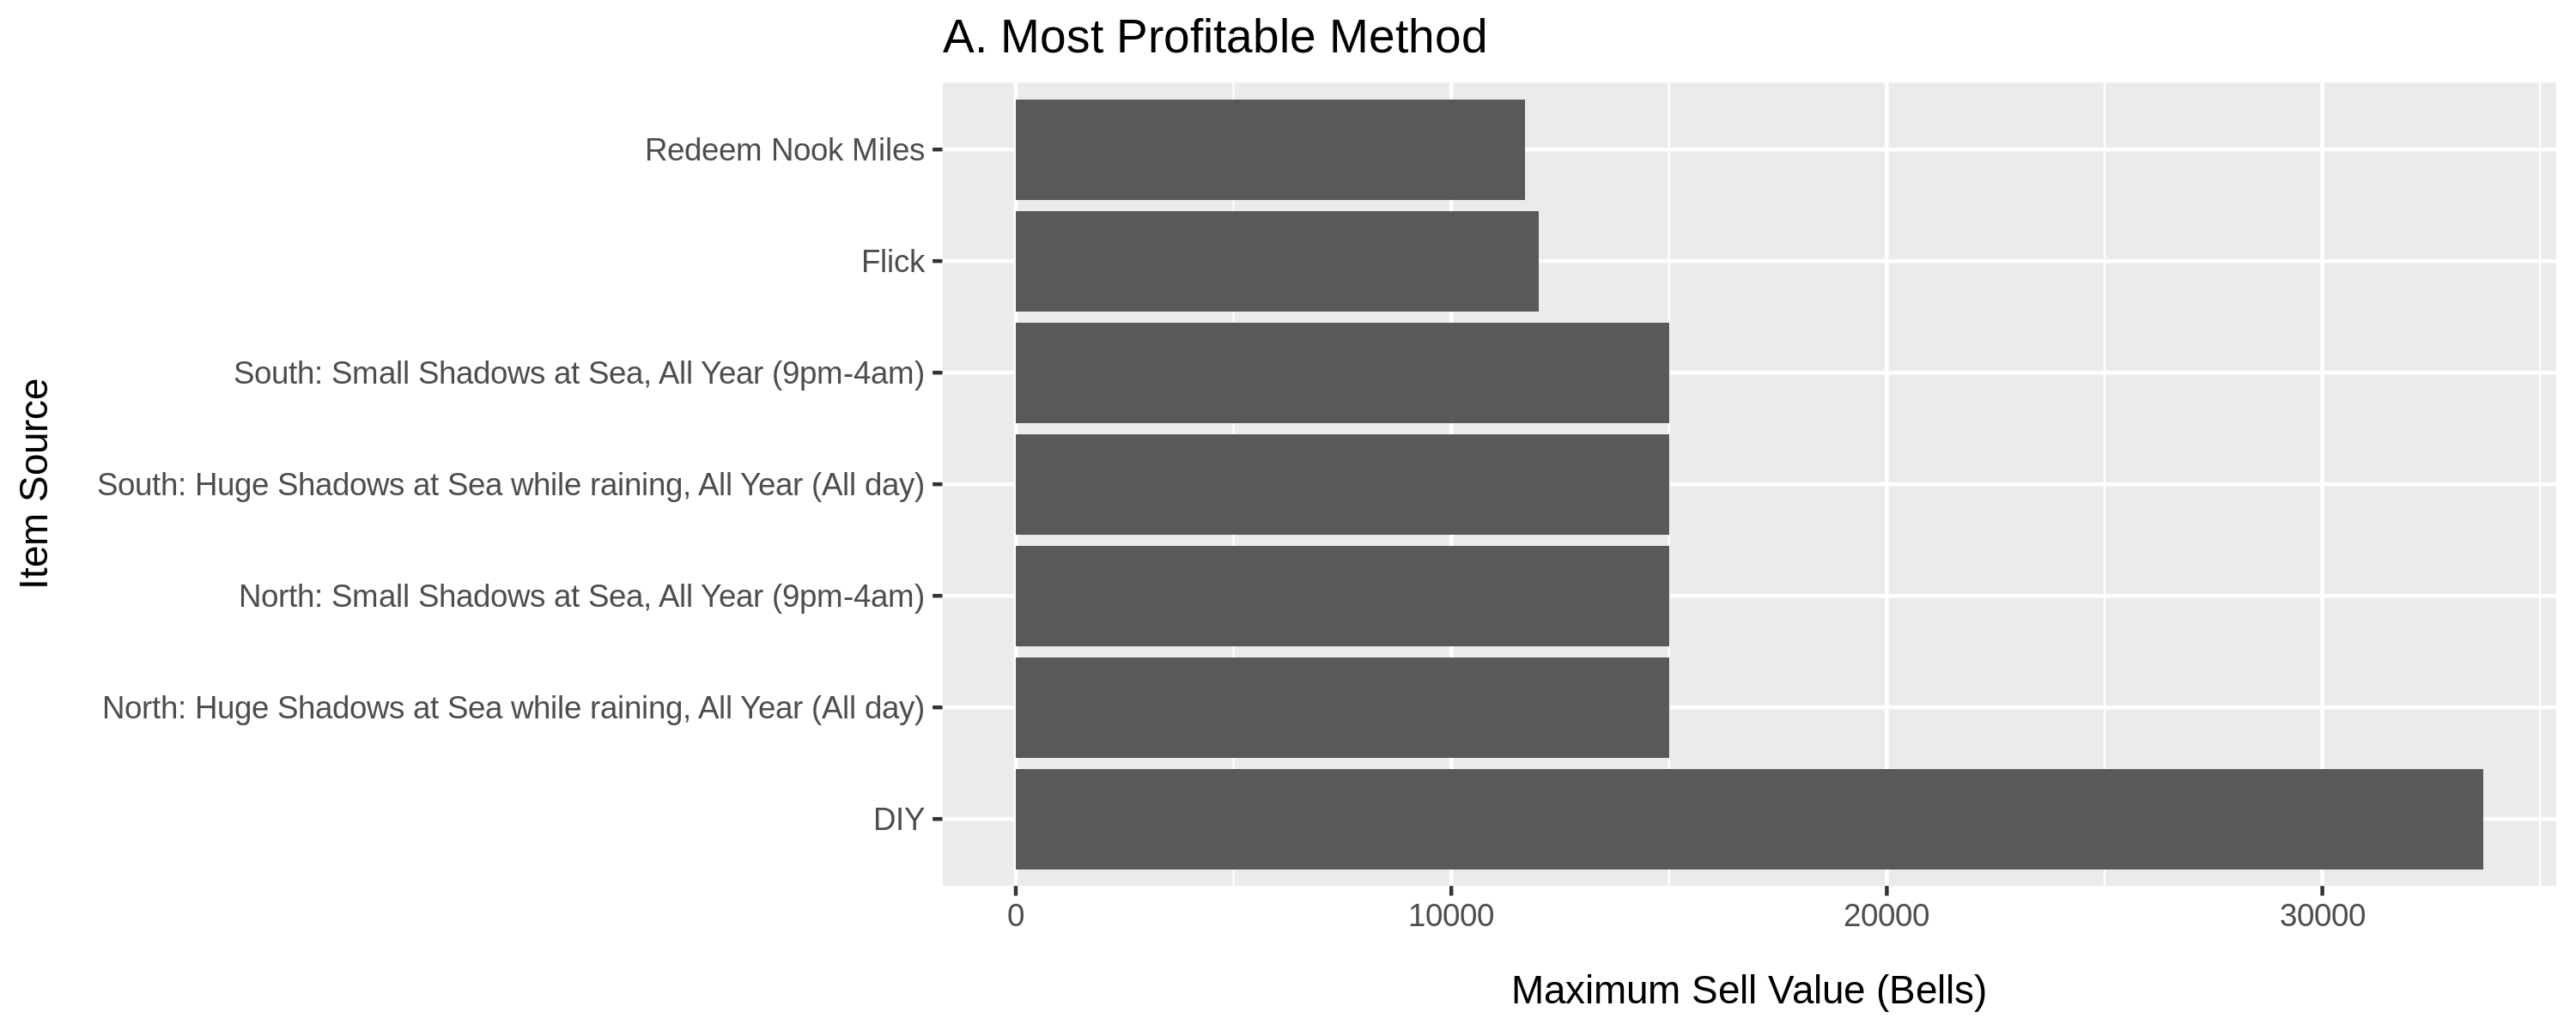

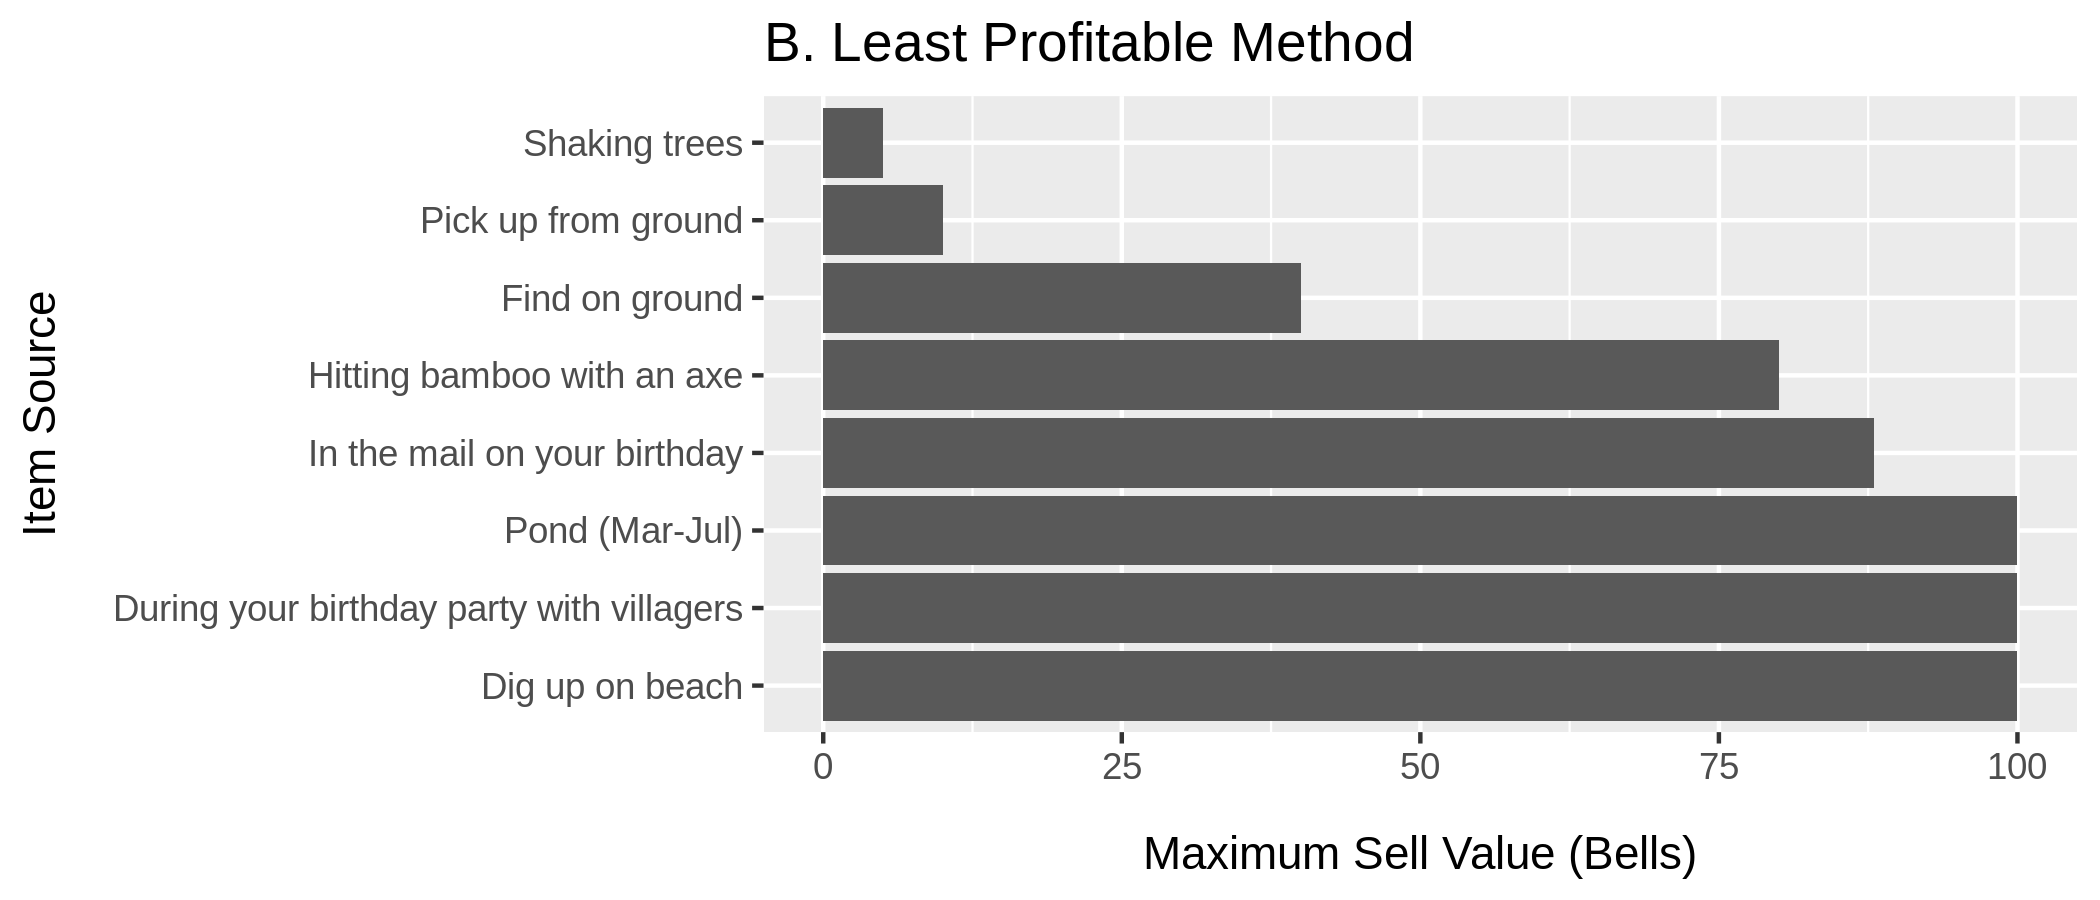

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
p6
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 300)
p7


In [7]:
MostProfit

num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>
6844,trophy-case,Trophy Case,Furniture,NA,33690,bells,134760,bells,DIY,NA,24,hardwood,nh,item-trophy-case,https://villagerdb.com/images/items/thumb/trophy-case.717c476.png
6844,trophy-case,Trophy Case,Furniture,NA,33690,bells,134760,bells,DIY,NA,3,gold-nugget,nh,item-trophy-case,https://villagerdb.com/images/items/thumb/trophy-case.717c476.png
6844,trophy-case,Trophy Case,Furniture,NA,33690,bells,134760,bells,DIY,NA,6,iron-nugget,nh,item-trophy-case,https://villagerdb.com/images/items/thumb/trophy-case.717c476.png


The currency in game is called "bells", and players can gain bells from various sources. Looking at Figure A, the source with the potential to give the player the highest sell value is from selling DIY Trophy Case. Player can sell that single item for 33,690 bells. Other profitable sources come fishing especially those from huge shadows while raining (as can see by the example screenshot below...!). However, if you want to make good profit out of bugs, it looks like it's much better to sell it to Flick as compared to selling it at the shop as Flick comes in 6th in the list. Looking at Figure B, it's recommended that players don't waste their time shaking trees or picking up items from the ground as they don't even sell for 25 bells! As for fishing, avoid ponds during the months of March to July because the most you'll make out of doing so is 100 bells. 

![Alternative text describing the image](https://pbs.twimg.com/media/EaGwufGUYAAC649?format=jpg&name=large)

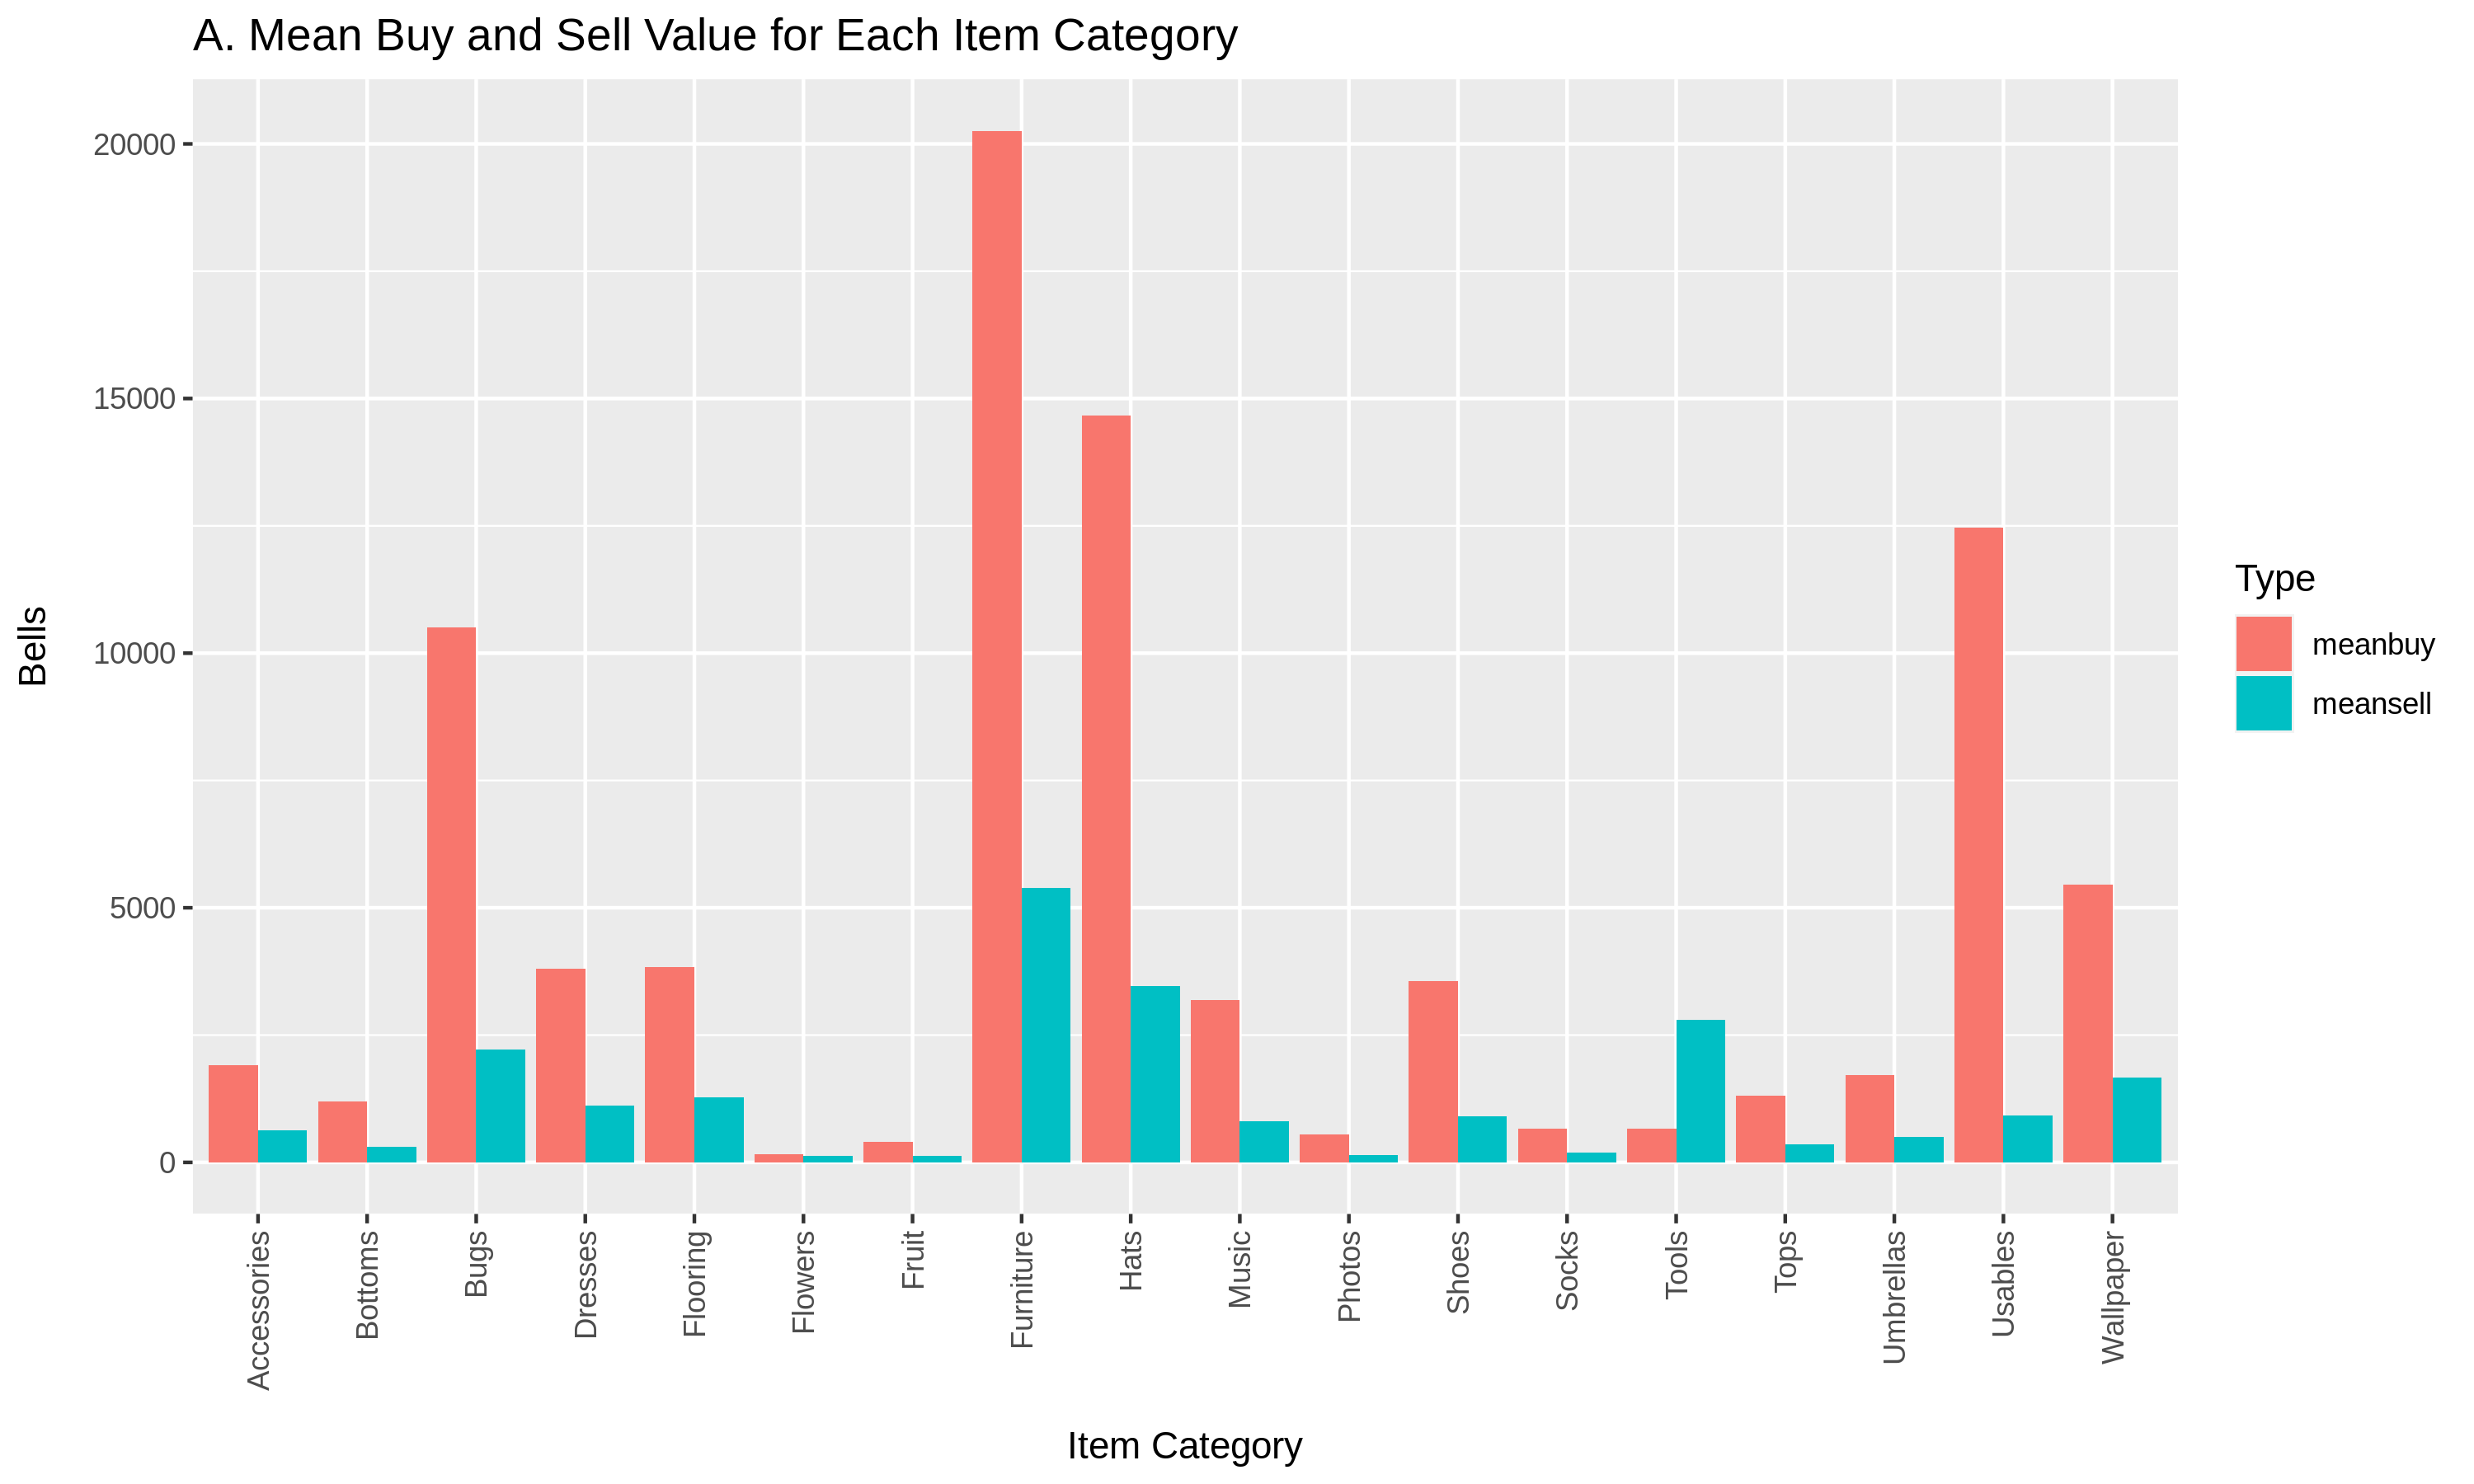

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)
p8

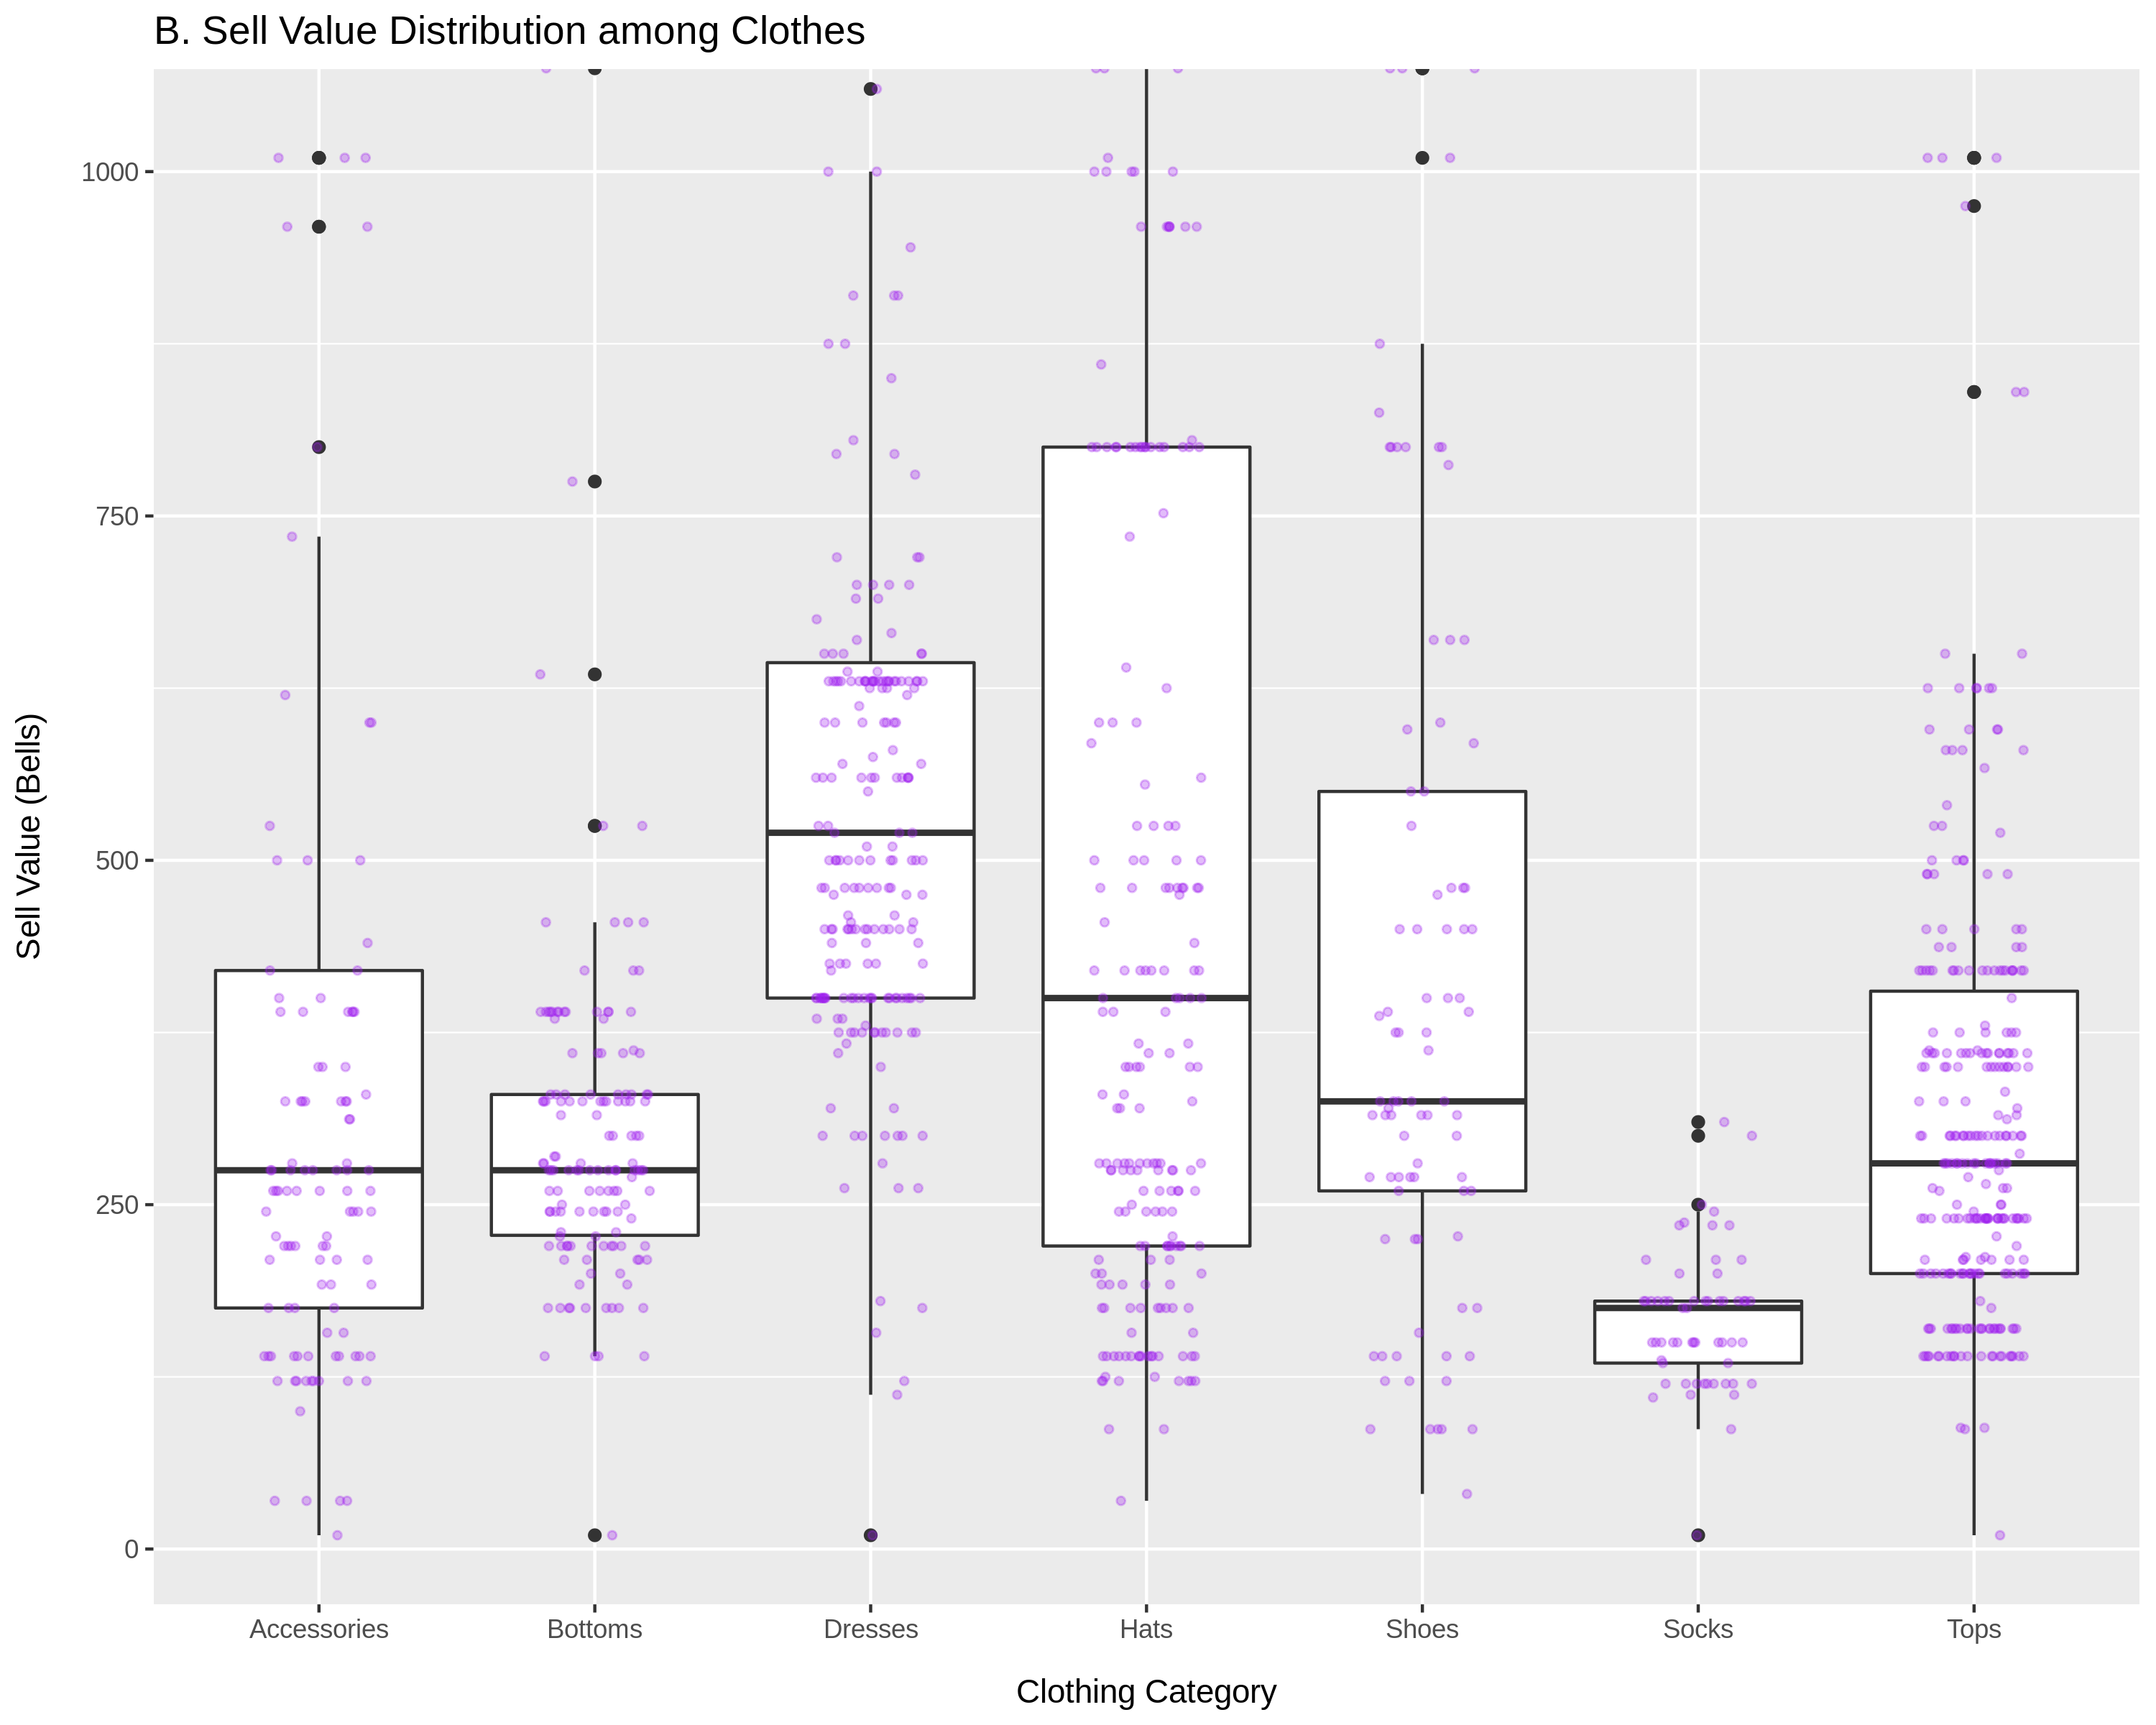

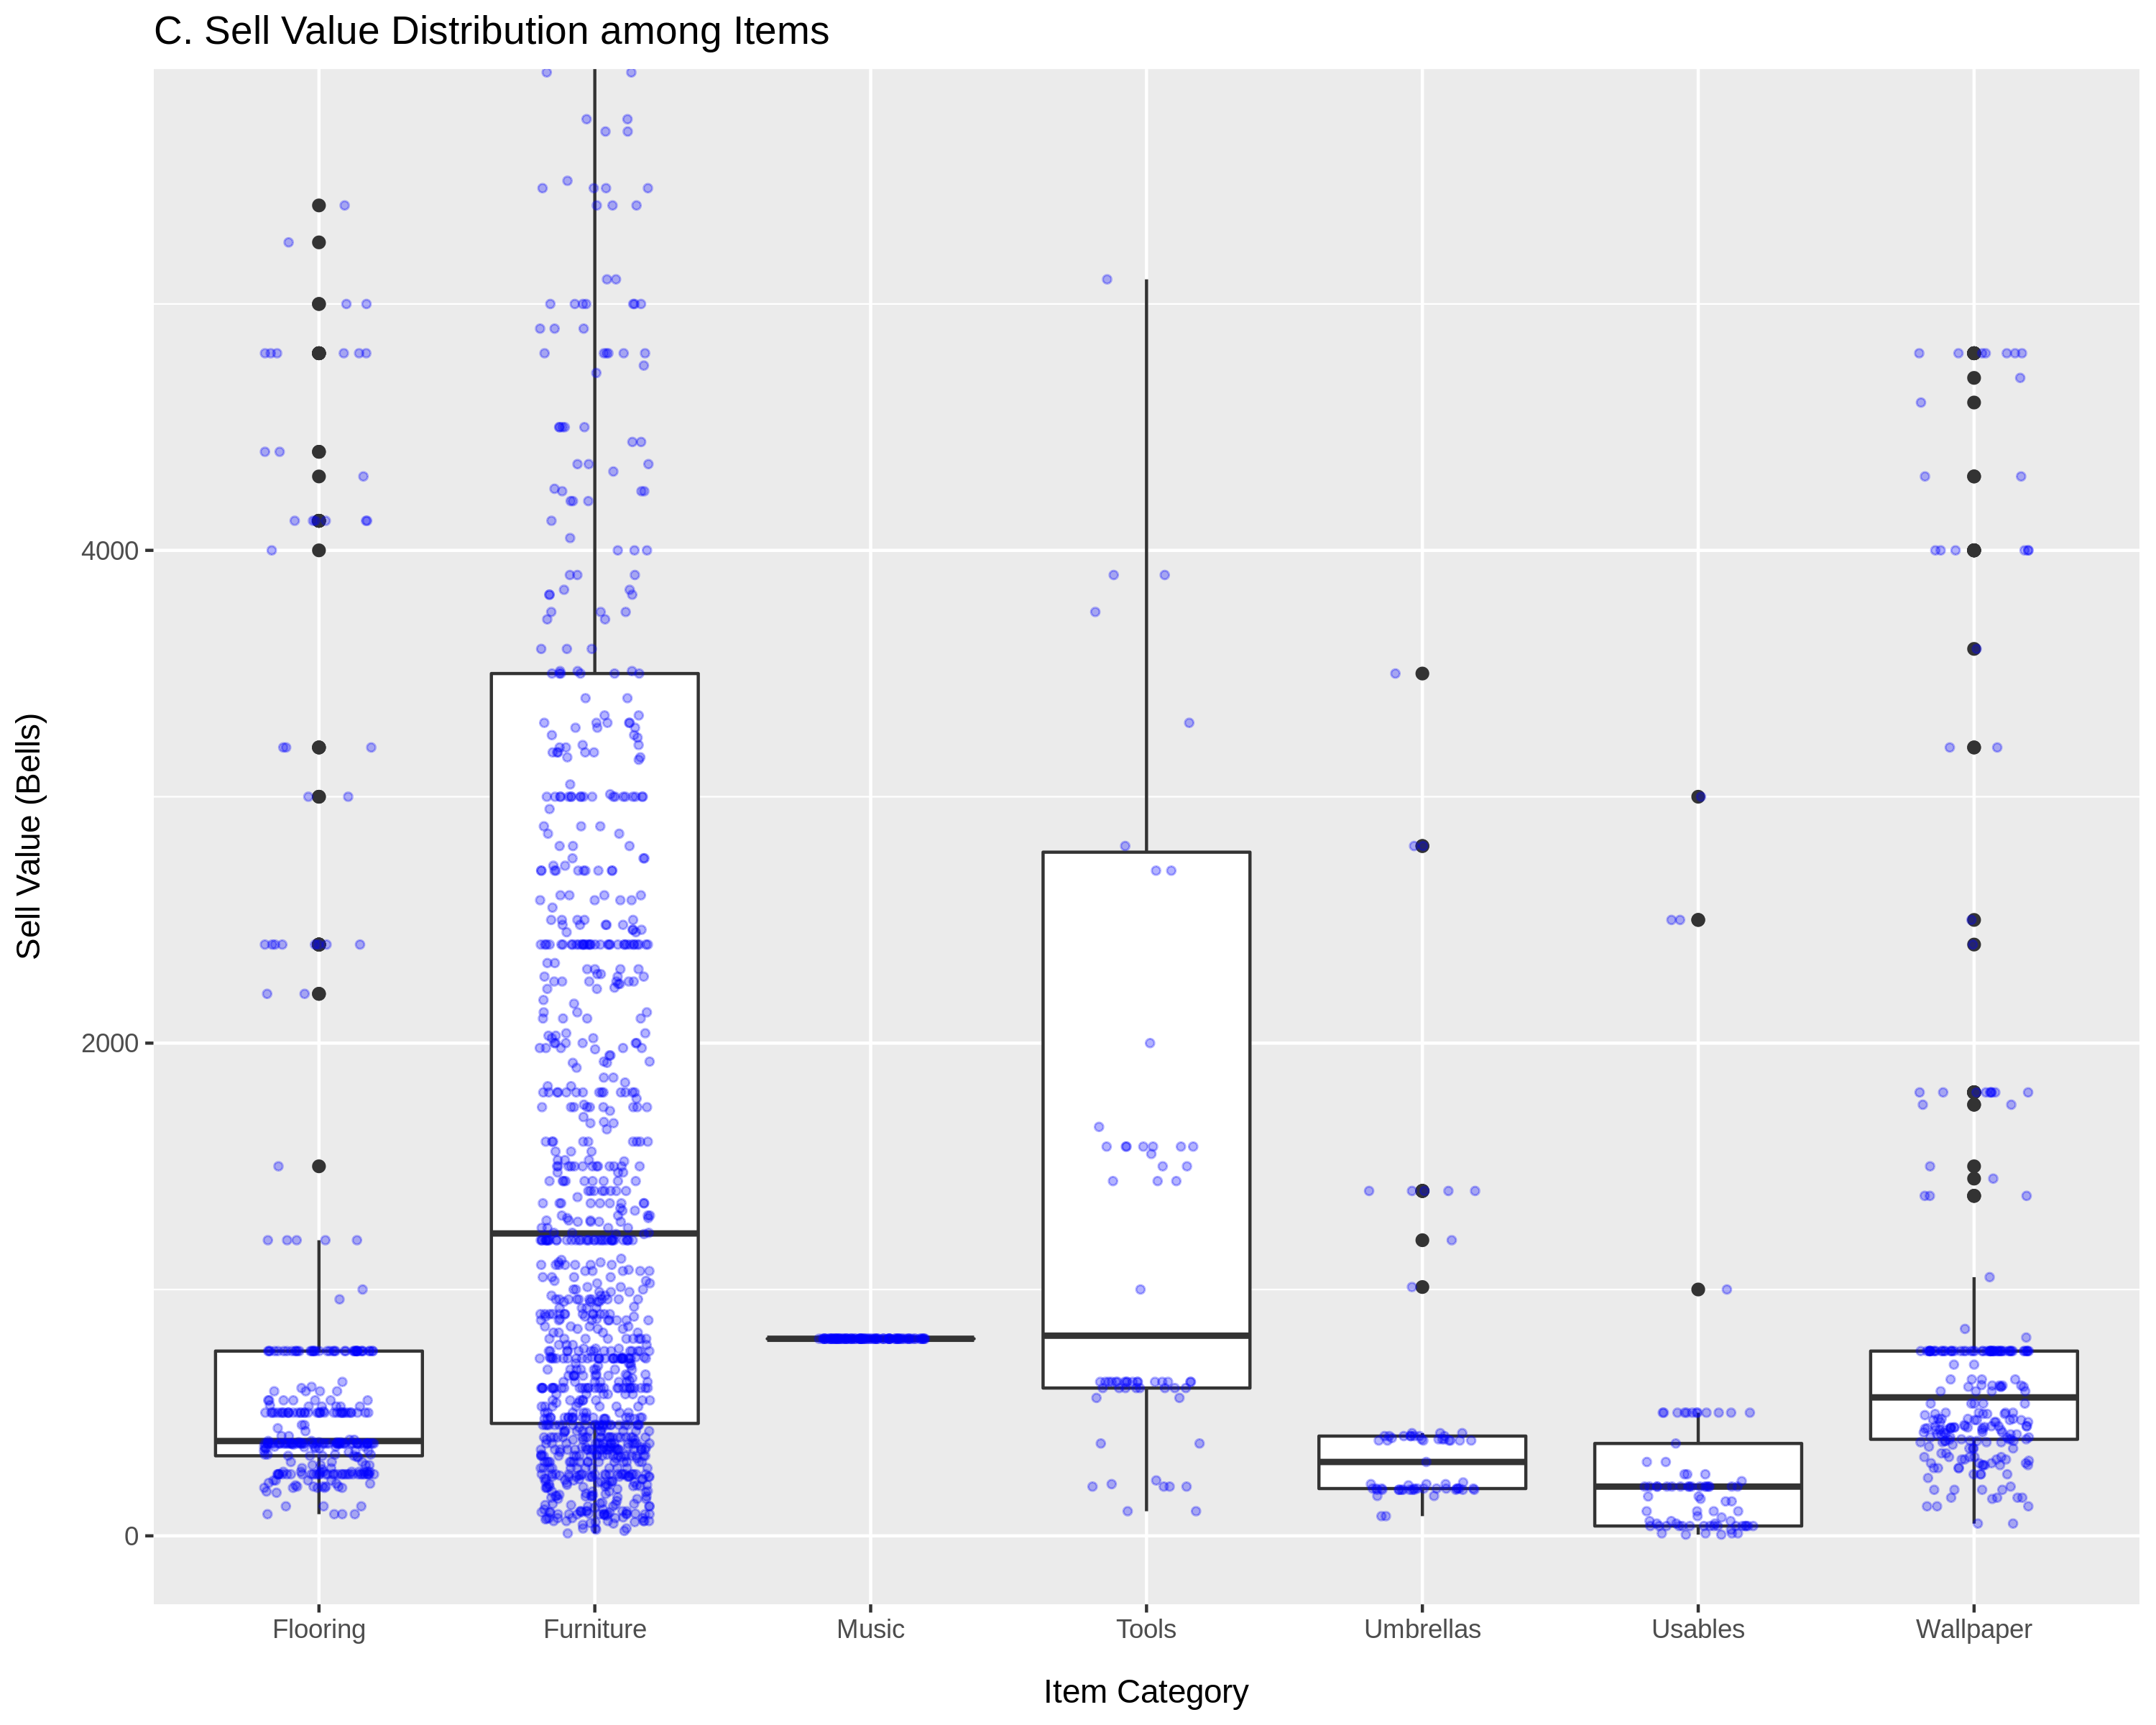

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 300)
p9
p10

In general, each item in Figure A costs much more to buy than to sell them on average except for tools, which will sell for much more than buying. That could be a possible strategy to make money if one has the time and necessary materials to do so. It appears that flowers, fruits, photos, and socks don't sell as much, nor do they costs much to buy either. Furnitures, tools, and hats appear to be most profitable in terms of selling. However, looking at Figure B, in which the Box plot has taken out outliers, the medium for dresses is higher than hats. So it may be assumed that selling dresses have a better chance of providing greater profit than selling hats. Hats have a much broader range in sell value, and few hats in the extremely high sell price range may be skewing the data seen in Figure A. As for non-clothing item categories, furnitures persist in being the most profitable in terms of sell value.  

***

![Alternative text describing the image](https://static3.thegamerimages.com/wordpress/wp-content/uploads/2020/06/Animal-Crossing-Thank-You.jpg)